In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

data=pd.read_csv('exoTrain.csv')
train_data = pd.read_csv('exoTrain.csv')
test_data=pd.read_csv('exoTest1.csv')

In [6]:
data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,1.140152,522.890833,443.753295,347.486136,281.712841,240.706629,174.312538,167.104508,85.567159,25.146667,...,-5.379278,-54.962510,-79.961901,-56.789962,-26.096958,14.552167,30.696046,63.124829,122.204791,157.240570
std,0.347804,9362.162928,8069.885754,6403.617279,5198.654140,4340.710197,3177.176868,2872.331952,1637.249473,1141.548374,...,1056.182110,1646.502401,2232.602475,2167.279502,1691.717238,1223.359931,1055.867060,1184.953728,1762.231362,2300.983111
min,1.000000,-11278.690000,-11299.250000,-11141.000000,-10927.190000,-10766.880000,-10553.070000,-10330.570000,-10086.250000,-9860.130000,...,-11143.450000,-23351.450000,-33590.270000,-31861.950000,-23298.890000,-13056.110000,-4609.940000,-4617.690000,-4806.750000,-5010.190000
25%,1.000000,-69.425000,-77.695000,-71.205000,-64.817500,-69.755000,-61.697500,-60.430000,-56.797500,-49.782500,...,-31.335000,-25.385000,-23.890000,-24.575000,-22.165000,-21.030000,-43.930000,-42.665000,-33.365000,-36.660000
50%,1.000000,2.415000,2.470000,3.805000,3.520000,1.105000,2.425000,2.690000,4.140000,0.830000,...,-0.510000,3.030000,3.470000,2.120000,0.340000,4.180000,-5.750000,-2.520000,0.110000,-0.340000
75%,1.000000,74.297500,74.655000,58.425000,63.642500,65.747500,60.912500,65.115000,53.587500,48.607500,...,23.470000,26.815000,34.485000,38.245000,42.435000,38.860000,16.820000,21.285000,24.525000,22.365000
max,2.000000,150725.800000,129578.360000,102184.980000,82253.980000,67934.170000,48063.520000,42745.020000,18971.550000,12646.060000,...,10291.060000,10470.310000,10849.310000,12112.810000,11539.750000,12006.250000,14553.750000,14007.000000,23261.020000,33565.480000


In [7]:
fig = data.isnull().sum().reset_index().plot(kind='bar', x='index', y=0)
fig.update_layout(title="Checking for Missing Values", xaxis_title="Variable", yaxis_title="Missing Value Count")
fig.show()

In [8]:
data = data.drop_duplicates()

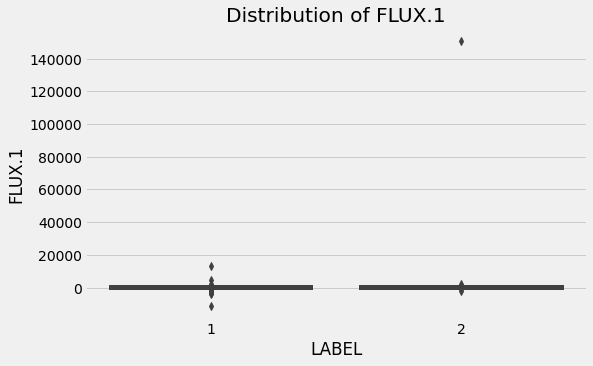

In [9]:
sns.boxplot(data=data, x='LABEL', y='FLUX.1')
plt.title('Distribution of FLUX.1')
plt.show()

In [10]:
print('Dropping Outliers')
data.drop(data[data['FLUX.1']>250000].index, axis=0, inplace=True)

Dropping Outliers


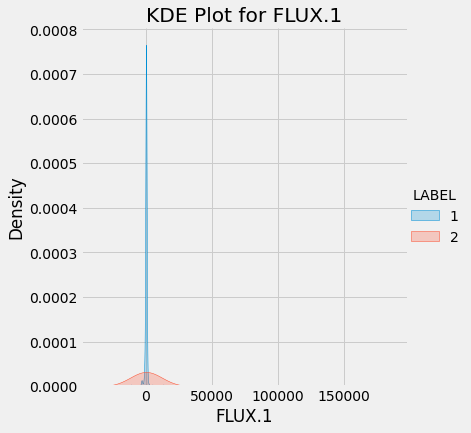

In [11]:
sns.FacetGrid(data, hue="LABEL", height=6,).map(sns.kdeplot, "FLUX.1",shade=True).add_legend()
plt.title('KDE Plot for FLUX.1')
plt.show()

In [12]:
data['LABEL'].value_counts().reset_index().plot(kind='bar', x='index', y='LABEL', color='LABEL')

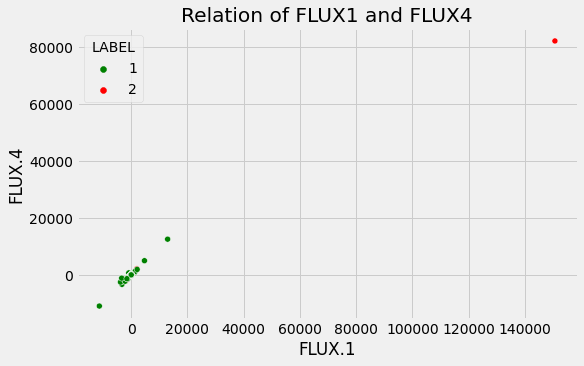

In [13]:
sns.scatterplot(data=data, x='FLUX.1', y='FLUX.4', hue='LABEL', palette=['g','r'])
plt.title('Relation of FLUX1 and FLUX4')
plt.show()

In [14]:
fig = px.scatter_matrix(data[['FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']])
fig.update_layout(title="Scatter Matrix for first 5 light intensities")
fig.show()

Pairplot for first 5 intensities


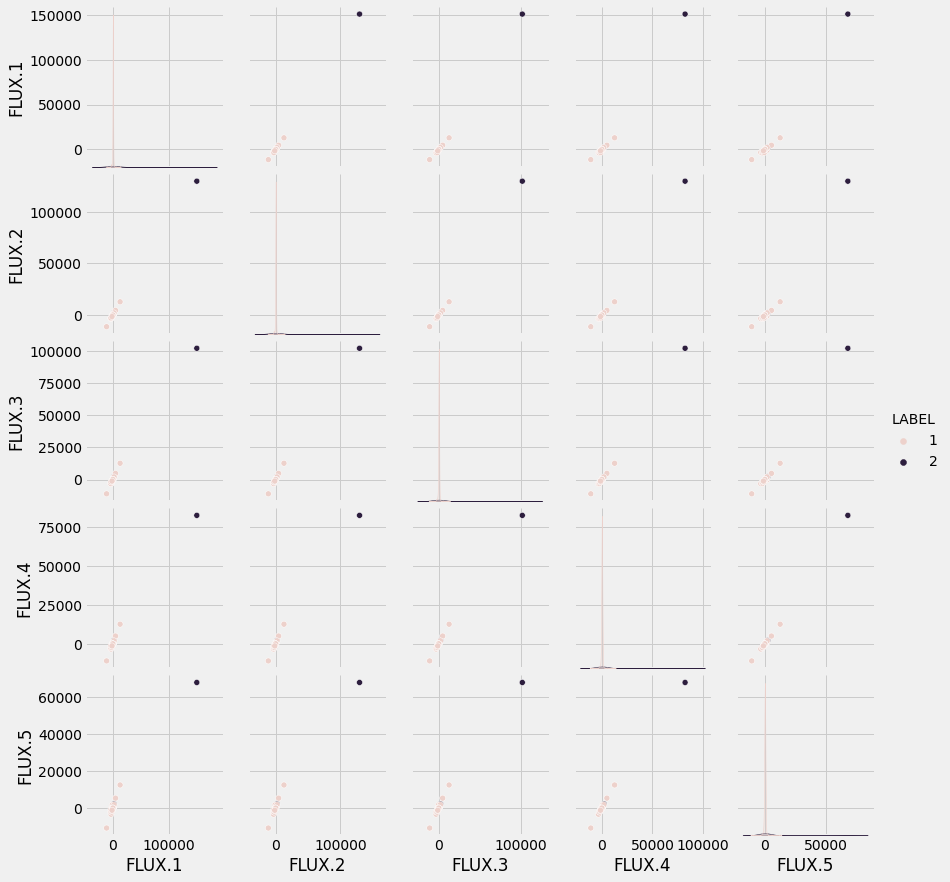

In [15]:
print('Pairplot for first 5 intensities')
sns.pairplot(data=data[['LABEL','FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']], hue='LABEL')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)

train_X = train.drop('LABEL', axis=1)
train_y = train['LABEL']
test_X = test.drop('LABEL', axis=1)
test_y = test['LABEL']

In [17]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix

In [25]:
model = LogisticRegression(class_weight={1:100, 2:1})
model.fit(train_X,train_y)
test_X = test_X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is', accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.75


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



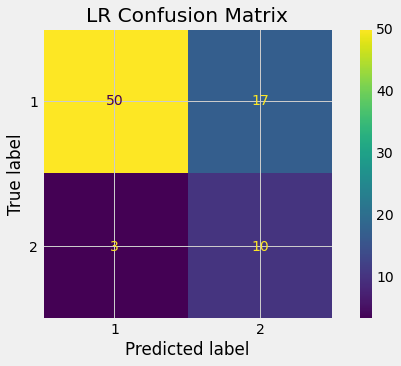

In [26]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('LR Confusion Matrix')
plt.show()

In [27]:
model = SVC(C=0.1, kernel='poly')
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVC is', accuracy_score(prediction,test_y))

The accuracy of the SVC is 0.8375


In [28]:
model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is', accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.8125


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



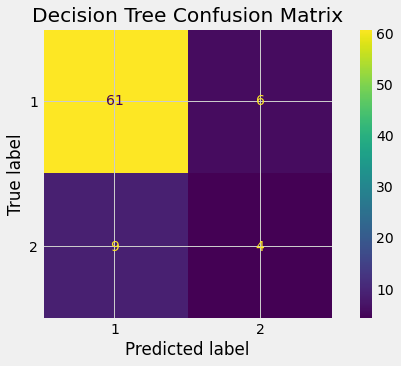

In [29]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('Decision Tree Confusion Matrix')
plt.show()

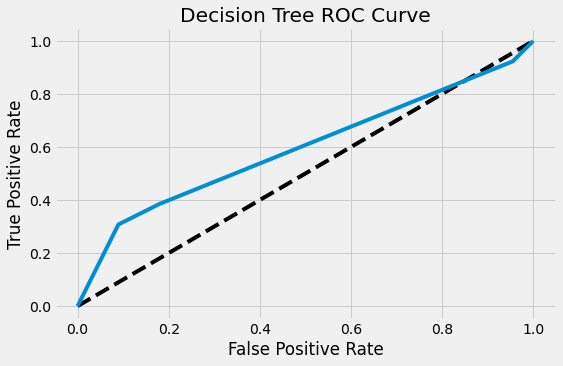

In [30]:
model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(train_X, train_y)
y_pred_prob = model.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

In [34]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
data = data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
ov_train_x,ov_train_y = model.fit_resample(data.drop('LABEL',axis=1), data['LABEL'])
ov_train_y = ov_train_y.astype('int')

In [35]:
ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')

In [36]:
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is', accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



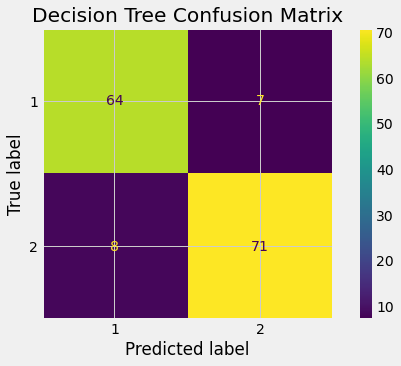

In [37]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('Decision Tree Confusion Matrix')
plt.show()

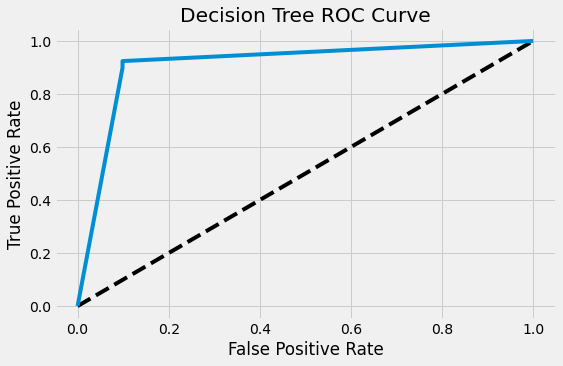

In [38]:
model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(train_X, train_y)
y_pred_prob = model.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()